# Logistic Regression: Titanic Dataset

This example will use Logistic Regression to determine whether or not passengers survived on the Titanic

## Import the Libraries and Modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

## Import the Data

In [2]:
train_df= pd.read_csv('datasets/titanic_train.csv')
test_df = pd.read_csv('datasets/titanic_test.csv')

Make a backup copy of our training and testing data

In [3]:
train_copy = train_df.copy()
test_copy = test_df.copy()

Use the .info() function to get information about our datasets. This gives us information about each of the variables found in our data. We can see that our testing data contains all columns from our training data except for the Survived column. This column does not exist in our testing data because this is the data point which we are trying to predict in our testing data.

In [4]:
print(train_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(test_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


We can use the .describe() function to give us statistical details about all of our numeric data points

In [6]:
print(train_copy.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
print(test_copy.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


Use the .isnull() function to get the number of null values for each variable

In [8]:
print(train_copy.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print(test_copy.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We can remove any columns we feel may not be necessary in our predictions

In [10]:
train_copy.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_copy.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace= True)

## Explore the Data

Determine the median age of passengers in our training data

In [11]:
train_copy['Age'].median()

28.0

Display all possible values for the 'Embarked' column in the training dataset and what the most frequently occuring value is

In [12]:
print("Possible values for 'Embarked' column")
print(train_copy['Embarked'].unique())
print("\n")
print("Most commonly occuring value")
print(train_copy['Embarked'].mode()[0])

Possible values for 'Embarked' column
['S' 'C' 'Q' nan]


Most commonly occuring value
S


We can fill null/NA values for age with the median age, and null/NA values for Embarked with the most commonly occuring value in the Embarked column

In [13]:
train_copy['Age'].fillna(train_copy['Age'].median(), inplace=True)
train_copy['Embarked'].fillna(train_copy['Embarked'].mode()[0], inplace=True)

Verify our training dataset contains no more null values

In [14]:
print(train_copy.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


Get the median age of our testing dataset

In [15]:
test_copy['Age'].median()

27.0

Get the median fare in our test dataset

In [16]:
test_copy['Fare'].median()

14.4542

Replace null values for Age and Fare columns in our test dataset with the median values for each column

In [17]:
test_copy['Age'].fillna(test_copy['Age'].median(), inplace=True)
test_copy['Fare'].fillna(test_copy['Fare'].median(), inplace=True)

Verify no more null values in our test dataset

In [18]:
print(test_copy.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


the value_counts() function will give us the number of unique values in a specified column

In [19]:
train_copy['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
train_copy['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
train_copy['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
train_copy['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [23]:
train_copy['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [24]:
train_copy['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
test_copy['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [26]:
test_copy['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [27]:
test_copy['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [28]:
test_copy['Parch'].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

In [29]:
test_copy['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

## Visualizing Training and Testing Datasets

Create a countplot of the Survived column in our training data to see how many passengers survived and how many did not survive. We can observe that more people did not survive than did survive.

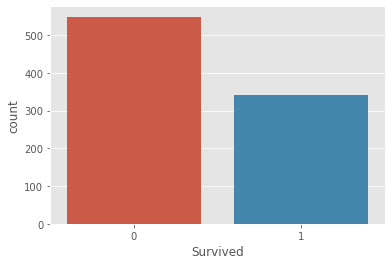

In [30]:
ax = sns.countplot(x="Survived", data=train_copy)

Create a countplot based on the Sex column of our training data that displays the number of men vs. women. We can observe that there are almost twice as many men than there were women.

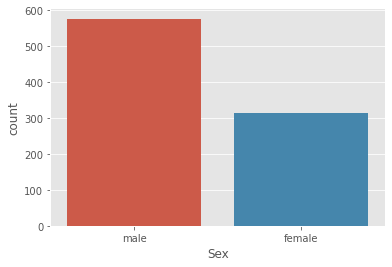

In [31]:
ax = sns.countplot(x="Sex", data=train_copy)

Create a countplot that visualizes the number of men vs women who did not survive vs. those that did survive. Our Sex column can be the hue and the X axis can be the survived column.

We can observe that of those who did not survive, there were more men than women that did not survive. Of those that did survive, more women than men survived.

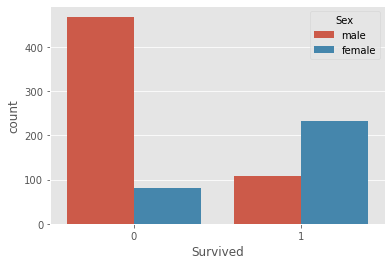

In [32]:
ax = sns.countplot(x="Survived", hue="Sex", data=train_copy)

Create a countplot that visualizes the surviving and non surviving passengers by class. The Survived column can be the X axis and the Pclass column can be the hue.

We can observe from the non surviving, it was comprised of mostly class 3 (lower class), while of the survivors, there was a pretty even distribution of first class, middle class, and lower class survivors.

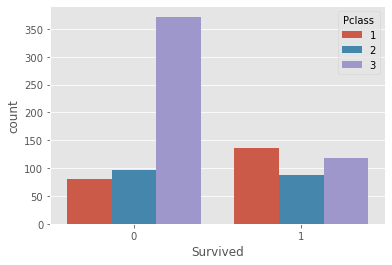

In [33]:
ax = sns.countplot(x="Survived", hue="Pclass", data=train_copy)

Create a boxplot that visualizes how many people survived by age grouped by gender.

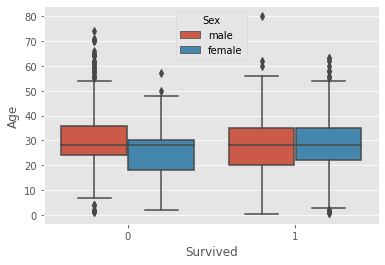

In [34]:
ax = sns.boxplot(x="Survived", y="Age", hue="Sex", data=train_copy)

Create a boxplot that visualizes the Fare price based on each class. We can see that first class passengers paid more than middle and lower class passengers.

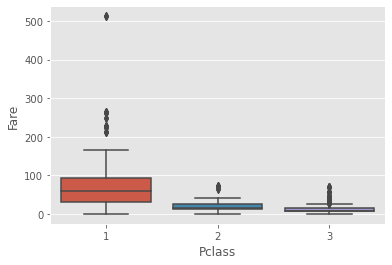

In [35]:
ax = sns.boxplot(x="Pclass", y="Fare", data=train_copy)

Now let's visualize our testing data set. Create a countplot of men vs. women. We can see more men than women.

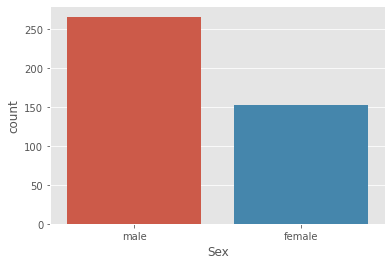

In [36]:
ax = sns.countplot(x="Sex", data=test_copy)

Create a boxplot that visualizes the Fare price based on each class. We can see that first class passengers paid more than middle and lower class passengers.

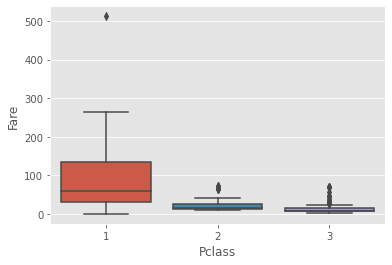

In [37]:
ax = sns.boxplot(x="Pclass", y="Fare", data=test_copy)

Let's check our training dataset for any possible outliers. We can see the Age, SibSp, Parch, and Fare columns all contain outliers.

<AxesSubplot:>

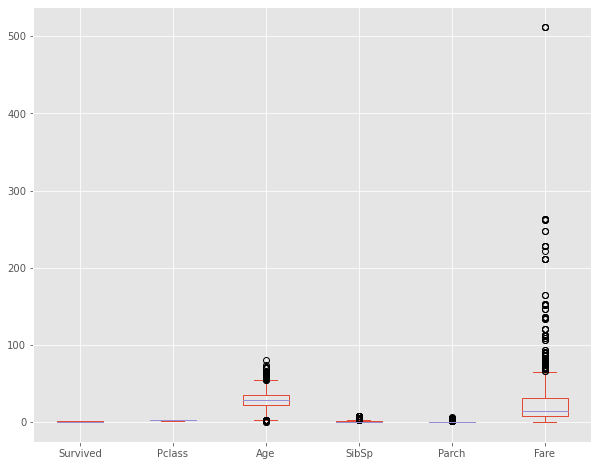

In [38]:
train_copy.plot(kind='box', figsize= (10,8))

Use the clip() cuntion to remove all the outliers in each column. We can drop the Parch column entirely as it consists of mostly 0.

In [39]:
cols= ['Age', 'SibSp', 'Parch', 'Fare']

train_copy[cols]= train_copy[cols].clip(lower= train_copy[cols].quantile(0.15), upper= train_copy[cols].quantile(0.85), axis=1)

train_copy.drop(columns=['Parch'], axis=1, inplace=True)

Now that we have removed outliers as well as the parch column, let's plot the updated dataset. We can see that we have a much cleaner dataset now with no outliers.

<AxesSubplot:>

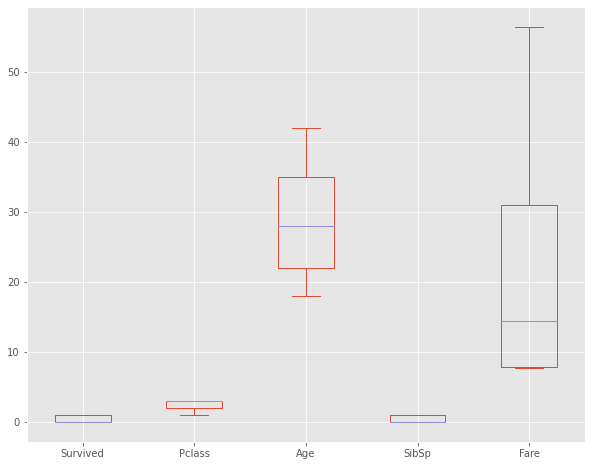

In [40]:
train_copy.plot(kind='box', figsize= (10,8))

Now let's do the same with our testing dataset. Let's plot our dataset to identify outliers in each column. We can again see that our Age, SibSp, Parch, and Fare columns all contain outliers just as our training dataset did.

<AxesSubplot:>

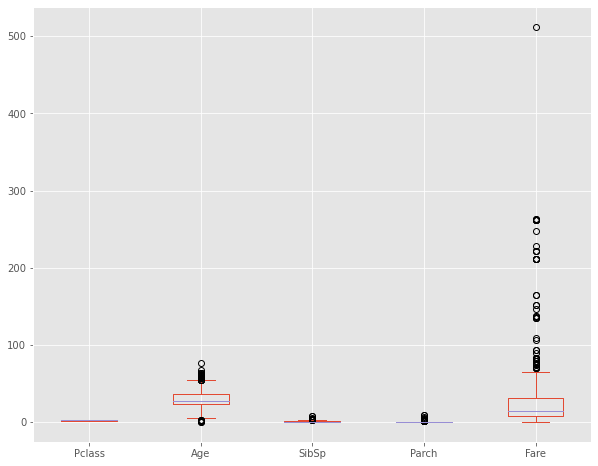

In [41]:
test_copy.plot(kind='box', figsize= (10,8))

We can remove outliers from all columns and remove the Parch column entirely from our testing dataset just as we did with our training dataset.

In [42]:
cols= ['Age', 'SibSp', 'Parch', 'Fare']

test_copy[cols]= test_copy[cols].clip(lower= test_copy[cols].quantile(0.15), upper= test_copy[cols].quantile(0.85), axis=1)

test_copy.drop(columns=['Parch'], axis=1, inplace=True)

Now that we have removed outliers as well as the parch column, let's plot the updated testing dataset. We can see that we have a much cleaner dataset now with no outliers.

<AxesSubplot:>

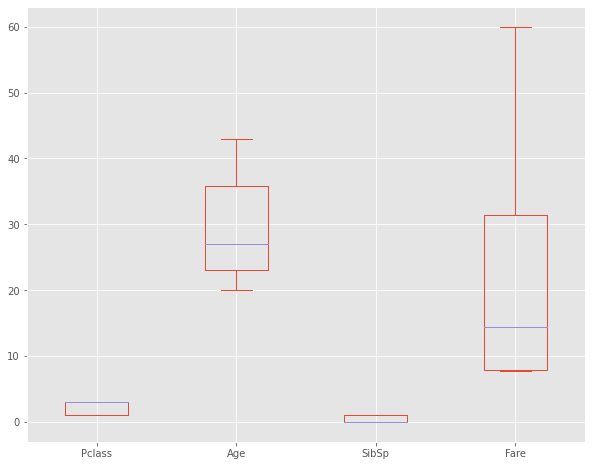

In [43]:
test_copy.plot(kind='box', figsize= (10,8))

## Preparing our Model

One Hot Encoding can be used to convert categorical (non numerical) data, into numerical data. Let's use one not encoding on our categorical data.

In [44]:
train_copy= pd.get_dummies(train_copy, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)

test_copy= pd.get_dummies(test_copy, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)

Now let's get a preview of our modified train and test datasets. We can see our categorical data has been converted into numerical data. Columns that were previously categorical are now replaced with a boolean 0, 1 value.

In [45]:
train_copy.head()

,Survived,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,7.7500,0,1,1,0,1
1,1,38.0,1,56.4958,0,0,0,0,0
2,1,26.0,0,7.9250,0,1,0,0,1
3,1,35.0,1,53.1000,0,0,0,0,1
4,0,35.0,0,8.0500,0,1,1,0,1


In [46]:
test_copy.head()

,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,7.8292,0,1,1,1,0
1,43.0,1,7.7500,0,1,0,0,1
2,43.0,0,9.6875,1,0,1,1,0
3,27.0,0,8.6625,0,1,1,0,1
4,22.0,1,12.2875,0,1,0,0,1


Now we can split our data. Let's determine which values should be our X and Y values. Since we are trying to predict whether or not a passenger survived, our Y axis can be the Survived column, while the X axis can contain the remainder of the columns.

In [52]:
# iloc [:, 1:] will get all columns except for the Survived column
X_train= train_copy.iloc[:, 1:]
y_train= train_copy['Survived'].values.reshape(-1,1)

X_test= test_copy

Feature Scaling is used to standardize the independent variables present in the data in a fixed range.

In [53]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [54]:
features= ['Age', 'SibSp', 'Fare']

X_train[features]= ss.fit_transform(X_train[features])
X_test[features]= ss.fit_transform(X_test[features])

In [55]:
X_train.head()

,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.865086,1.465746,-0.853616,0,1,1,0,1
1,1.123252,1.465746,1.876088,0,0,0,0,0
2,-0.368001,-0.682247,-0.843816,0,1,0,0,1
3,0.750438,1.465746,1.685928,0,0,0,0,1
4,0.750438,-0.682247,-0.836817,0,1,1,0,1


In [56]:
X_test.head()

,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.660130,-0.690675,-0.830005,0,1,1,1,0
1,1.731843,1.447859,-0.834124,0,1,0,0,1
2,1.731843,-0.690675,-0.733364,1,0,1,1,0
3,-0.285498,-0.690675,-0.786669,0,1,1,0,1
4,-0.915918,1.447859,-0.598151,0,1,0,0,1


## Perform Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression()

clf.fit(X_train, y_train.ravel())

predictions= clf.predict(X_test)

In [58]:
print(clf.score(X_train, y_train))

0.792368125701459


In [59]:
submission= pd.DataFrame({'PassengerId' : test_df['PassengerId'], 'Survived': predictions })

print(submission.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [60]:
filename= 'titanic_predictions.csv'
submission.to_csv(filename, index=False)